In [1]:
import sqlite3 
import pandas as pd
#import pandas_profiling as pp
import numpy as np

import statsmodels.api as sm

import seaborn as sns

sns.set_style("whitegrid")


In [2]:
conn = sqlite3.connect('traffic.db')
c = conn.cursor()

In [3]:
sql_master = """SELECT * FROM sqlite_master"""
pd.read_sql_query(sql_master, conn)

,type,name,tbl_name,rootpage,sql
0,table,traffic,traffic,2,"CREATE TABLE traffic(\n ""SeqID"" TEXT,\n ""Dat..."


In [4]:
### sql_master = """SELECT sql FROM sqlite_master"""
pd.read_sql_query(sql_master, conn)

,type,name,tbl_name,rootpage,sql
0,table,traffic,traffic,2,"CREATE TABLE traffic(\n ""SeqID"" TEXT,\n ""Dat..."


In [5]:
sql_all = "SELECT * FROM traffic"
all_df = pd.read_sql_query(sql_all, conn)
all_df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
0,865defcf-8348-4e11-a5bf-996d8b3ead3c,06/03/2019,22:49:00,MCP,"2nd District, Bethesda",DRIVER CHANGING LANES WHEN UNSAFE,ROCKVILLE PIKE @ GROSVENOR LN,39.0231383333333,-77.102615,No,...,WASHINGTON,DC,DC,A - Marked Patrol,"(39.0231383333333, -77.102615)",1,1,12,111,1
1,20bff600-1843-46c4-9596-6b0670eb8d74,06/03/2019,22:48:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER/ROYAL DOMINION,38.99006,-77.15189,No,...,POTOMAC,MD,MD,A - Marked Patrol,"(38.99006, -77.15189)",1,1,12,103,1
2,e121eebe-daa1-4cca-afd4-8abb4b388ed6,06/03/2019,22:45:00,MCP,"4th District, Wheaton",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,GEORGIA @ EPPING,39.0662666666667,-77.0592166666667,No,...,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0662666666667, -77.0592166666667)",4,4,23,6,1
3,1e25ee9b-c019-41c2-9d74-41e05e6d1cee,06/03/2019,22:43:00,MCP,"4th District, Wheaton",STOP LIGHTS (*),GEORGIA AVE / ASPON HILL RD,39.0825783333333,-77.076885,No,...,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.0825783333333, -77.076885)",4,4,59,6,1
4,2c5730ec-d5e6-4657-a5a0-fcecca1ab140,06/03/2019,22:41:00,MCP,"2nd District, Bethesda",FAILURE TO DISPLAY & REFLECT RED COLOR LIGHT O...,ARLINGTON RD / BETHESDA AVE,38.97886,-77.0985183333333,No,...,BETHESDA,MD,MD,A - Marked Patrol,"(38.97886, -77.0985183333333)",1,1,12,111,1


In [6]:
all_df.columns

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation',
       'Council Districts', 'Councils', 'Communities', 'Zip Codes',
       'Municipalities'],
      dtype='object')

In [7]:
#pp.ProfileReport(all_df)

In [8]:
all_df.describe()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
count,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,...,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036
unique,867384,2710,1440,1,9,13987,210296,298798,339125,6,...,7940,69,71,19,749951,6,6,63,145,25
top,33c49de3-9e36-4f36-9326-b59a95e86fe8,03/17/2015,23:30:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WAYNE AVE @ DALE DR,0,0,No,...,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)",4,4,36,17,1
freq,59,1281,2312,1529036,375716,125683,2172,110485,110485,1482066,...,380216,1379705,1329309,1267088,110485,334292,334292,184196,131235,1161876


In [9]:
all_df['Violation Type'].value_counts()

Warning     760397
Citation    693505
ESERO        74235
SERO           899
Name: Violation Type, dtype: int64

In [10]:
grouped_race_violation = all_df.groupby(['Race', 'Violation Type']).size().astype(float)

In [11]:
all_df.groupby(['Race']).size()

Race
ASIAN               89675
BLACK              484206
HISPANIC           326826
NATIVE AMERICAN      3168
OTHER               83378
WHITE              541783
dtype: int64

In [12]:
all_df['Arrest Type'].value_counts()

A - Marked Patrol                         1267088
Q - Marked Laser                           139542
B - Unmarked Patrol                         48181
S - License Plate Recognition               14509
O - Foot Patrol                             14076
L - Motorcycle                              13031
E - Marked Stationary Radar                  9511
G - Marked Moving Radar (Stationary)         8210
R - Unmarked Laser                           6140
I - Marked Moving Radar (Moving)             2476
M - Marked (Off-Duty)                        2272
H - Unmarked Moving Radar (Stationary)       1115
F - Unmarked Stationary Radar                 837
J - Unmarked Moving Radar (Moving)            654
C - Marked VASCAR                             483
P - Mounted Patrol                            338
D - Unmarked VASCAR                           302
N - Unmarked (Off-Duty)                       216
K - Aircraft Assist                            55
Name: Arrest Type, dtype: int64

In [13]:
sum(grouped_race_violation['WHITE'])

541783.0

In [14]:
grouped_normalize = grouped_race_violation.copy()

for race in grouped_race_violation.index.levels[0]:
    race_viol = sum(grouped_race_violation[race])
    for viol in grouped_race_violation.index.levels[1]:
        try:
            grouped_normalize[race][viol] = grouped_race_violation[race][viol] / float(race_viol)
        except:
            pass

In [15]:
grouped_normalize

Race             Violation Type
ASIAN            Citation          0.377285
                 ESERO             0.051709
                 SERO              0.000379
                 Warning           0.570627
BLACK            Citation          0.466892
                 ESERO             0.047441
                 SERO              0.000529
                 Warning           0.485139
HISPANIC         Citation          0.518475
                 ESERO             0.062510
                 SERO              0.000826
                 Warning           0.418189
NATIVE AMERICAN  Citation          0.410354
                 ESERO             0.068182
                 Warning           0.521465
OTHER            Citation          0.388484
                 ESERO             0.045180
                 SERO              0.000516
                 Warning           0.565821
WHITE            Citation          0.425370
                 ESERO             0.041002
                 SERO              0.000546


In [16]:
all_df.groupby(['Race', 'Arrest Type']).size().astype(float)

Race   Arrest Type                           
ASIAN  A - Marked Patrol                          73514.0
       B - Unmarked Patrol                         2400.0
       C - Marked VASCAR                             41.0
       D - Unmarked VASCAR                           22.0
       E - Marked Stationary Radar                  731.0
       F - Unmarked Stationary Radar                 50.0
       G - Marked Moving Radar (Stationary)         543.0
       H - Unmarked Moving Radar (Stationary)        60.0
       I - Marked Moving Radar (Moving)             114.0
       J - Unmarked Moving Radar (Moving)            37.0
       K - Aircraft Assist                            1.0
       L - Motorcycle                               838.0
       M - Marked (Off-Duty)                        169.0
       N - Unmarked (Off-Duty)                        7.0
       O - Foot Patrol                              800.0
       P - Mounted Patrol                            24.0
       Q - Marked Laser   

In [17]:
all_df['Arrest Type'].value_counts(True)

A - Marked Patrol                         0.828684
Q - Marked Laser                          0.091261
B - Unmarked Patrol                       0.031511
S - License Plate Recognition             0.009489
O - Foot Patrol                           0.009206
L - Motorcycle                            0.008522
E - Marked Stationary Radar               0.006220
G - Marked Moving Radar (Stationary)      0.005369
R - Unmarked Laser                        0.004016
I - Marked Moving Radar (Moving)          0.001619
M - Marked (Off-Duty)                     0.001486
H - Unmarked Moving Radar (Stationary)    0.000729
F - Unmarked Stationary Radar             0.000547
J - Unmarked Moving Radar (Moving)        0.000428
C - Marked VASCAR                         0.000316
P - Mounted Patrol                        0.000221
D - Unmarked VASCAR                       0.000198
N - Unmarked (Off-Duty)                   0.000141
K - Aircraft Assist                       0.000036
Name: Arrest Type, dtype: float

In [18]:
len(all_df)

1529036

In [19]:
descrips = all_df.Description.value_counts()

In [20]:
descrips

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                              125683
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                       71761
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                                   48988
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND                39953
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                             37487
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                                36176
DRIVER FAILURE TO STOP AT STOP SIGN LINE                                                                 34753
PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE        30109
DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REGISTRATION PLATES AND VALIDATION TABS                       25113
E

In [21]:
np.percentile(descrips.values, 90, axis=0)

21.0

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
a = sorted(descrips.values)
cumsum_descrips = [sum(a[:i]) for i in range(len(a))]
#cumsum_descrips

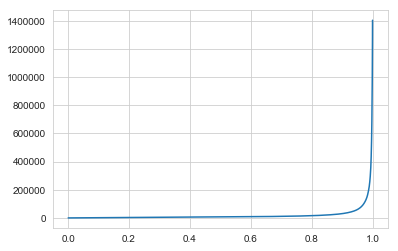

In [24]:
x_percentile = (np.array(range(len(a)))+1)/len(a)


plt.plot(x_percentile, cumsum_descrips)

In [25]:
all_df.Description.value_counts().index[1]

'FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER'

In [26]:
viol_type = 'FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER'

all_df[all_df['Description'].isin([viol_type])].groupby('Race').size()

Race
ASIAN               5100
BLACK              24133
HISPANIC           13885
NATIVE AMERICAN      141
OTHER               4031
WHITE              24471
dtype: int64

In [27]:
sql_all = '''
SELECT * FROM traffic
WHERE race = 'BLACK'
ORDER BY RANDOM() 
LIMIT 5000
'''
df_black = pd.read_sql_query(sql_all, conn)
df_black.shape

(5000, 41)

In [28]:
sql_all = '''
SELECT * FROM traffic
WHERE race = 'HISPANIC'
ORDER BY RANDOM() 
LIMIT 5000
'''
df_hispanic = pd.read_sql_query(sql_all, conn)
df_hispanic.shape

(5000, 41)

In [29]:
from scipy.stats import ttest_ind

In [30]:
black_citation_sample = (df_black['Violation Type'] == 'Citation')*1
mu_black = sum(black_citation_sample) / len(black_citation_sample)

In [31]:
hispanic_citation_sample = (df_hispanic['Violation Type'] == 'Citation')*1
mu_hispanic = sum(hispanic_citation_sample) / len(hispanic_citation_sample)

In [32]:
ttest_ind(black_citation_sample, hispanic_citation_sample, equal_var=False)

Ttest_indResult(statistic=-6.9563607733066455, pvalue=3.71048074948325e-12)

In [33]:
def sample_from_traffic(n_sample, connection, race=None, gender=None, show_SQL=True):
    """Returns a random sample from the specified sqlite db connection, from the table called traffic.
    Order is randomized.
    Can specify a race to filter on.
    Prints the equivalent SQL query.
    Returns the dataframe result of the SQL query"""
    var_count = 0
    if race:
        condition = "WHERE race ='{}'".format(race.upper())
        var_count += 1
    else:
        condition = "--"
    if gender:
        if var_count > 0:
            condition = condition + """
            AND Gender = '{}'""".format(gender.upper()[0])
        else:
            condition = "WHERE gender ='{}'".format(gender.upper()[0])
    sql_str = '''
        SELECT * FROM traffic
        {0}
        ORDER BY RANDOM() 
        LIMIT {1}
        '''.format(condition, n_sample)
    if show_SQL: print(sql_str)
    df = pd.read_sql_query(sql_str, connection)
    return df

In [34]:
def sample_from_traffic_2(n_sample, connection, filters={}, show_SQL=True):
    """Returns a random sample from the specified sqlite db connection, from the table called traffic.
    Order is randomized.
    Can specify a race to filter on.
    Prints the equivalent SQL query.
    Returns the dataframe result of the SQL query"""
    var_count = 0
    condition = "--"
    for k, v in filters.items():
        if var_count==0:
            if type(v)!=str:
                condition = "WHERE {0} in {1}".format(k, tuple(v))
            else:
                condition = "WHERE {0} = '{1}'".format(k, v)
        else:
            if type(v)!=str:
                condition = condition + """
                AND {0} in {1}""".format(k, tuple(v))
            else:
                condition = condition + """
                AND {0} = '{1}'""".format(k, v)
        
        var_count += 1

    sql_str = '''
        SELECT * FROM traffic
        {0}
        ORDER BY RANDOM() 
        LIMIT {1}
        '''.format(condition, n_sample)
    if show_SQL: print(sql_str)
    df = pd.read_sql_query(sql_str, connection)
    return df

In [35]:
df_white = sample_from_traffic(5000, conn, 'White')
df_black = sample_from_traffic(5000, conn, 'Black')
df_hispanic = sample_from_traffic(5000, conn, 'Hispanic')
df_asian = sample_from_traffic(5000, conn, 'Asian')
df_other = sample_from_traffic(5000, conn, 'other')

df_race_sample = pd.concat([df_white, df_asian, df_black, df_hispanic, df_other])


X = pd.get_dummies(df_race_sample['Race'], prefix='Race')
X = X.drop(columns='Race_WHITE')
y = (df_race_sample['Violation Type'] == 'Citation')*1
y.columns = ['Citation']

X = sm.add_constant(X)

model_linreg = sm.OLS(y, X).fit()
model_linreg.summary()


        SELECT * FROM traffic
        WHERE race ='WHITE'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='BLACK'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='HISPANIC'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='ASIAN'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='OTHER'
        ORDER BY RANDOM() 
        LIMIT 5000
        


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Violation Type   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     75.77
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           5.75e-64
Time:                        12:12:33   Log-Likelihood:                -17801.
No. Observations:               25000   AIC:                         3.561e+04
Df Residuals:                   24995   BIC:                         3.565e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4352      0.007     62.393      0.000       0.422       0.449
Race_ASIAN       -0.0704      0.010     -7.137      0.000      -0.090      -0.051
Race_BLACK        0.0294      0.010      2.980      0.003       0.010       0.049
Race_HISPANIC     0.0886      0.010      8.982      0.000       0.069       0.108
Race_OTHER       -0.0334      0.010     -3.386      0.001      -0.053      -0.014
==============================================================================
Omnibus:                    91703.449   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3975.008
Skew:                           0.246   Prob(JB):                         0.00
Kurtosis:                       1.109   Cond. No.                         5.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
df_test = sample_from_traffic(5000, conn)


        SELECT * FROM traffic
        --
        ORDER BY RANDOM() 
        LIMIT 5000
        


In [37]:
df_test.Race.value_counts()

WHITE              1750
BLACK              1585
HISPANIC           1077
ASIAN               296
OTHER               280
NATIVE AMERICAN      12
Name: Race, dtype: int64

In [38]:
pd.to_datetime(all_df['Date Of Stop'], format='%m/%d/%Y').describe()

count                 1529036
unique                   2710
top       2015-03-17 00:00:00
freq                     1281
first     2012-01-01 00:00:00
last      2019-06-03 00:00:00
Name: Date Of Stop, dtype: object

In [39]:
import datetime

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


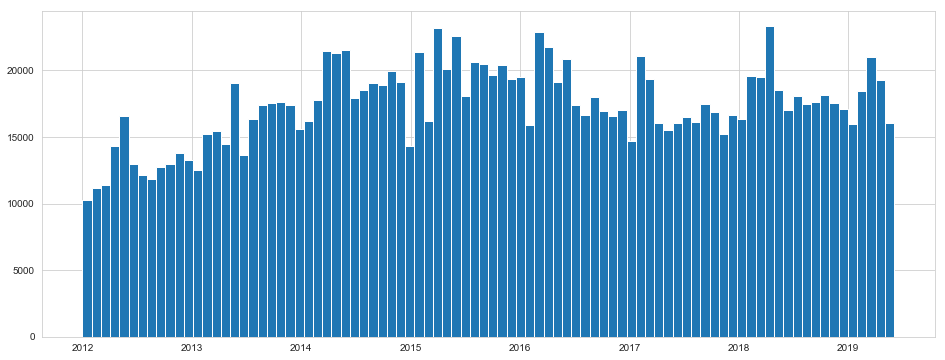

In [40]:
fig = plt.figure(figsize=(16, 6))
plt.hist(pd.to_datetime(all_df['Date Of Stop'], format='%m/%d/%Y'), bins=88);
#plt.xlim(datetime.date(2016,1,1))

In [41]:
all_df.Color.value_counts()

BLACK          311612
SILVER         279662
WHITE          237891
GRAY           172294
RED            119343
BLUE           111576
GREEN           54812
GOLD            46992
BLUE, DARK      32123
TAN             30408
MAROON          25856
BLUE, LIGHT     19699
BEIGE           17040
N/A             16362
GREEN, DK       15944
GREEN, LGT       8441
BROWN            6932
YELLOW           5684
ORANGE           5417
BRONZE           3477
PURPLE           2907
                 1746
MULTICOLOR       1157
CREAM             912
COPPER            469
PINK              211
CHROME             41
CAMOUFLAGE         28
Name: Color, dtype: int64

In [42]:
# Linear regression of Race versus Citation

df_white = sample_from_traffic(5000, conn, 'White')
df_black = sample_from_traffic(5000, conn, 'Black')
df_hispanic = sample_from_traffic(5000, conn, 'Hispanic')
df_asian = sample_from_traffic(5000, conn, 'Asian')
df_other = sample_from_traffic(5000, conn, 'other')

df_race_sample = pd.concat([df_white, df_asian, df_black, df_hispanic, df_other])


X = pd.get_dummies(df_race_sample['Race'], prefix='Race')
X = X.drop(columns='Race_WHITE')
y = (df_race_sample['Violation Type'] == 'Citation')*1
y.columns = ['Citation']

X = sm.add_constant(X)

model_logit = sm.Logit(y, X).fit()
model_logit.summary()


        SELECT * FROM traffic
        WHERE race ='WHITE'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='BLACK'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='HISPANIC'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='ASIAN'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='OTHER'
        ORDER BY RANDOM() 
        LIMIT 5000
        
Optimization terminated successfully.
         Current function value: 0.678456
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Violation Type   No. Observations:                25000
Model:                          Logit   Df Residuals:                    24995
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Jun 2019   Pseudo R-squ.:                0.007790
Time:                        12:12:50   Log-Likelihood:                -16961.
converged:                       True   LL-Null:                       -17095.
                                        LLR p-value:                 1.963e-56
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3006      0.029    -10.510      0.000      -0.357      -0.245
Race_ASIAN       -0.2290      0.041     -5.594      0.000      -0.309      -0.149
Race_BLACK        0.1829      0.040      4.543      0.000       0.104       0.262
Race_HISPANIC     0.3270      0.040      8.130      0.000       0.248       0.406
Race_OTHER       -0.1669      0.041     -4.093      0.000      -0.247      -0.087
=================================================================================
"""

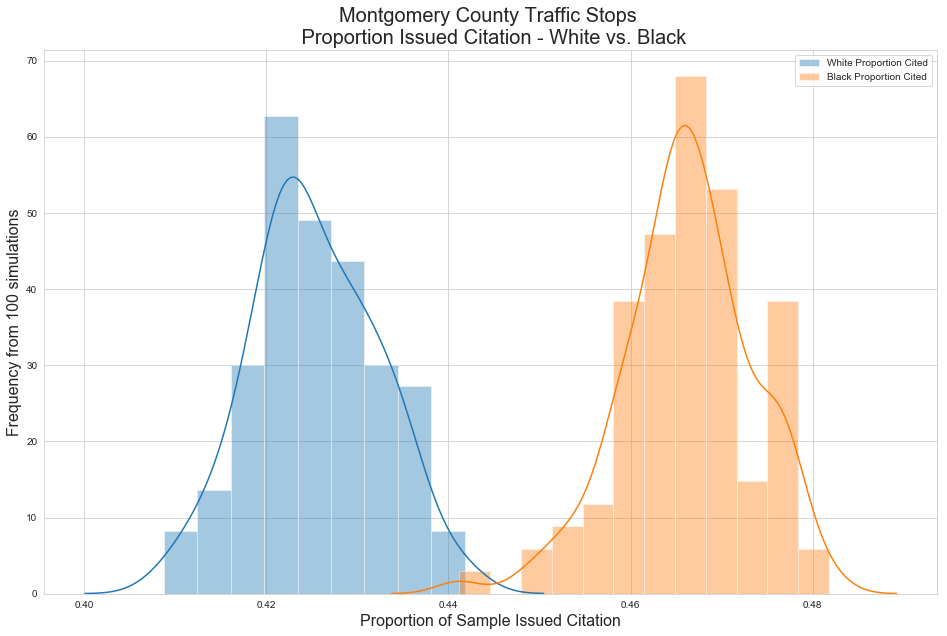

In [43]:
# 2 prop z-test on white versus black citations

from statsmodels.stats.proportion import proportions_ztest


n_sim = 100

mu_white_list = []
mu_black_list = []
z_list = []
p_list = []

for i in range(n_sim):
    n_sample = 5000

    df_white = sample_from_traffic(n_sample, conn, 'White', show_SQL=False)
    df_black = sample_from_traffic(n_sample, conn, 'Black', show_SQL=False)

    white_cited = sum(df_white['Violation Type'] == 'Citation')
    black_cited = sum(df_black['Violation Type'] == 'Citation')

    mu_white_list.append(white_cited / n_sample)
    mu_black_list.append(black_cited / n_sample)
    
    count = np.array([white_cited, black_cited])
    nobs = np.array([n_sample, n_sample])
    z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    z_list.append(z)
    p_list.append(p)
    


fig = plt.figure(figsize=(16,10))


sns.distplot(mu_white_list, label="White Proportion Cited")
sns.distplot(mu_black_list, label="Black Proportion Cited")
plt.title('Montgomery County Traffic Stops \n Proportion Issued Citation - White vs. Black', fontsize=20)

plt.xlabel('Proportion of Sample Issued Citation', fontsize=16)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=16)
plt.legend();


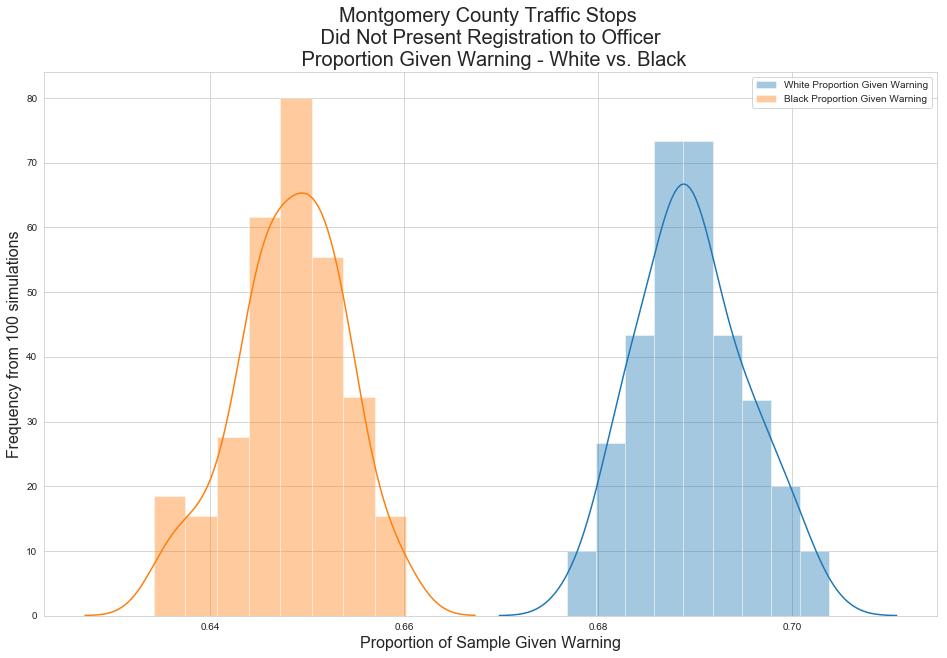

In [44]:
# 2 prop z-test on white versus black warnings

from statsmodels.stats.proportion import proportions_ztest

#n_sim is repeating the whole sampling process of 5000, 100 times
n_sim = 100

mu_white_list = []
mu_black_list = []
z_list = []
p_list = []

for i in range(n_sim):
    n_sample = 5000

    
    descrip = "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER"
    
    df_white = sample_from_traffic_2(n_sample, conn, filters={'race':'WHITE', 'Description':descrip}, show_SQL=False)
    df_black = sample_from_traffic_2(n_sample, conn, filters={'race':'BLACK', 'Description':descrip}, show_SQL=False)

    white_cited = sum(df_white['Violation Type'] == 'Warning')
    black_cited = sum(df_black['Violation Type'] == 'Warning')

    mu_white_list.append(white_cited / n_sample)
    mu_black_list.append(black_cited / n_sample)
    
    count = np.array([white_cited, black_cited])
    nobs = np.array([n_sample, n_sample])
    z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    z_list.append(z)
    p_list.append(p)
    


fig = plt.figure(figsize=(16,10))


sns.distplot(mu_white_list, label="White Proportion Given Warning")
sns.distplot(mu_black_list, label="Black Proportion Given Warning")
plt.title('Montgomery County Traffic Stops \n Did Not Present Registration to Officer \n Proportion Given Warning - White vs. Black', fontsize=20)

plt.xlabel('Proportion of Sample Given Warning', fontsize=16)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=16)
plt.legend();


In [46]:
# 2 prop z-test on white versus black warnings
# we are running a z-test instead of a t-test because we're looking at the proportions of sample 
#given a warning rather than the number of people

from statsmodels.stats.proportion import proportions_ztest

#n_sim is repeating the whole sampling process of 5000 people for each category, 100 times
n_sim = 100


mu_black_male_list = []
mu_black_female_list = []
mu_white_male_list = []
mu_white_female_list = []

z_list = []
p_list = []

for i in range(n_sim):
    n_sample = 5000

    df_black_male = sample_from_traffic_2(n_sample, conn, filters={'race':'BLACK','gender':'M'}, show_SQL=False)
    df_black_female = sample_from_traffic_2(n_sample, conn, filters={'race':'BLACK', 'gender':'F'}, show_SQL=False)
    df_white_male = sample_from_traffic_2(n_sample, conn, filters={'race':'BLACK', 'gender':'M'}, show_SQL=False)
    df_white_female = sample_from_traffic_2(n_sample, conn, filters={'race':'BLACK', 'gender':'F'}, show_SQL=False)


    black_male_cited = sum(df_black_male['Violation Type'] == 'Citation')
    black_female_cited = sum(df_black_female['Violation Type'] == 'Citation')
    white_male_cited = sum(df_white_male['Violation Type'] == 'Citation')
    white_female_cited = sum(df_white_female['Violation Type'] == 'Citation')

    mu_black_male_list.append(black_male_cited / n_sample)
    mu_black_female_list.append(black_female_cited / n_sample)
    mu_white_male_list.append(white_male_cited / n_sample)
    mu_white_female_list.append(white_female_cited / n_sample)
    
    nobs = np.array([n_sample, n_sample])
    
    z1,p1 = proportions_ztest(np.array([black_male_cited, black_female_cited]), nobs, value=0, alternative='two-sided')
    z2,p2 = proportions_ztest(np.array([black_male_cited, white_female_cited]), nobs, value=0, alternative='two-sided')
    z3,p3 = proportions_ztest(np.array([white_female_cited, black_female_cited]), nobs, value=0, alternative='two-sided')
    z4,p4 = proportions_ztest(np.array([white_male_cited, white_female_cited]), nobs, value=0, alternative='two-sided')

    z_list.append([z1, z2, z3, z4])
    p_list.append([p1, p2, p3, p4])
    



In [52]:
p1

1.3791331700564314e-12

In [67]:
p2

1.2686895950294175e-13

In [68]:
p3

0.7458206164881458

In [69]:
p4

2.3696192222860893e-14

In [61]:
z1_list =[x[0] for x in z_list]
z1_list

[6.778624696250473,
 6.9100767484430135,
 5.182363091833566,
 5.183146121762944,
 5.4012415334223975,
 5.526275691890843,
 4.760990920324057,
 8.119804156433956,
 5.1047737532832524,
 5.37363797382857,
 6.429946352078185,
 7.216610209321902,
 7.746086267006943,
 8.086571654191761,
 5.948399305155259,
 4.936788349786621,
 5.821166522437789,
 7.139152335969249,
 7.973374474150262,
 7.545911267408176,
 6.340938871877693,
 7.3918977433905155,
 6.906307332589503,
 7.109628692395712,
 8.498762697524896,
 7.529343463804698,
 5.460229401909635,
 7.201157694090117,
 6.229497484983084,
 7.005593205299256,
 7.5766200808397945,
 6.023367808155332,
 6.563699023251043,
 6.097822418017695,
 6.341988501745651,
 6.587452573745181,
 7.764073476198391,
 7.585047131549901,
 7.451464067083031,
 6.185551597997908,
 7.268221073404983,
 5.840939805032242,
 7.260132401368554,
 7.6261869191891165,
 6.022521047772192,
 6.18269305536959,
 8.197230461068292,
 7.917180241430456,
 7.224568316760906,
 7.2991553451726

In [57]:
p_list

[[1.2132523636984848e-11,
  2.6221735438382223e-08,
  0.22396081943748225,
  3.989417479892322e-09],
 [4.843915684794928e-12,
  7.41451659915145e-12,
  0.951520794739558,
  3.166420229561347e-10],
 [2.190921776479659e-07,
  4.7849281656095596e-11,
  0.16223326340386623,
  7.156768553397597e-13],
 [2.181739749885972e-07,
  3.4089422465830512e-09,
  0.4662457749190525,
  1.7328874010622678e-13],
 [6.618124426963673e-08,
  2.761464442909421e-07,
  0.7928754082190038,
  2.2306756812645756e-07],
 [3.2709999326593276e-08,
  1.9595249000762492e-07,
  0.7462240090838788,
  3.562416754971678e-11],
 [1.926447163786234e-06,
  2.3270317060445964e-10,
  0.11421264004559493,
  2.2663232051062294e-12],
 [4.669365539029564e-16,
  2.236627662097661e-20,
  0.25637850726279043,
  1.8406371784971482e-11],
 [3.3119051373080975e-07,
  1.1963831111807928e-05,
  0.4669989007217423,
  7.225884517485543e-11],
 [7.716370944126219e-08,
  5.286191608874455e-11,
  0.23358856340547085,
  3.317380877285735e-10],
 [1.

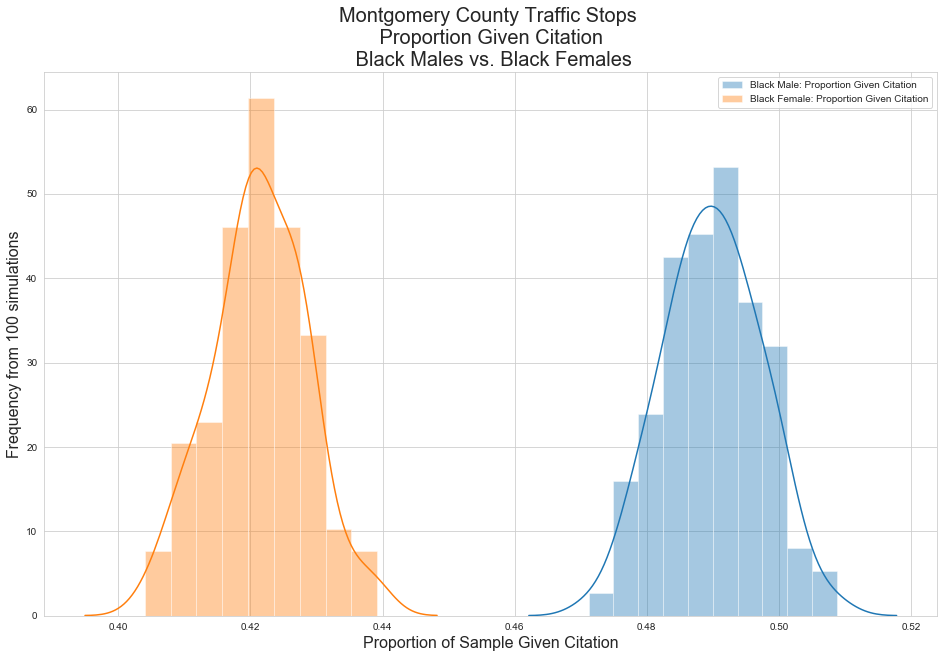

In [62]:
#Black Male vs. Black Female Citation Rate
fig = plt.figure(figsize=(16,10))

sns.distplot(mu_black_male_list, label="Black Male: Proportion Given Citation")
sns.distplot(mu_black_female_list, label="Black Female: Proportion Given Citation")


plt.title('Montgomery County Traffic Stops \n Proportion Given Citation \n Black Males vs. Black Females', fontsize=20)

plt.xlabel('Proportion of Sample Given Citation', fontsize=16)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=16)
plt.legend();

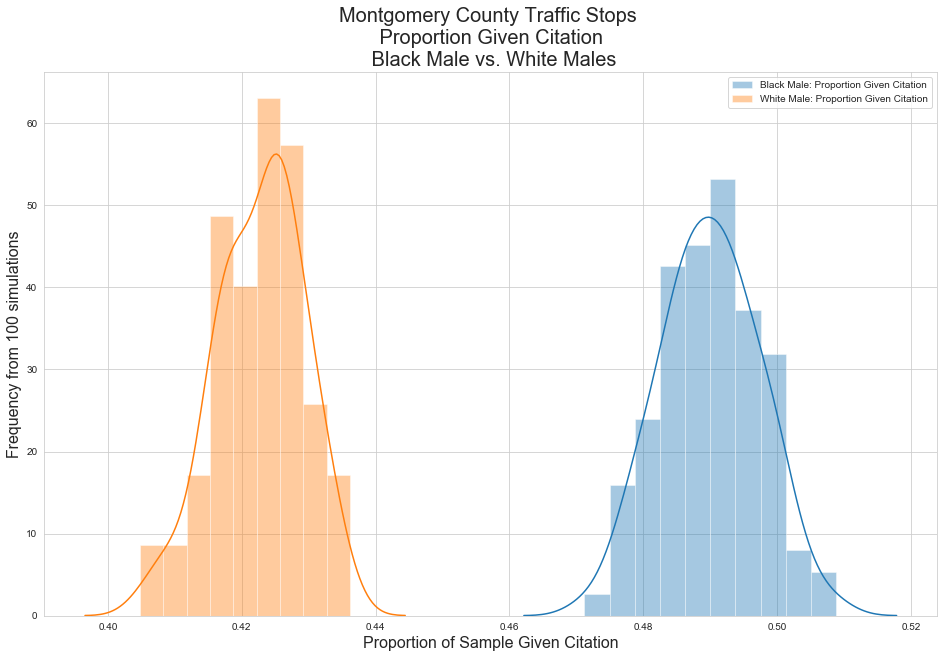

In [63]:
#Black Male vs. White Male Citation Rate
fig = plt.figure(figsize=(16,10))

sns.distplot(mu_black_male_list, label="Black Male: Proportion Given Citation")
sns.distplot(mu_white_female_list, label="White Male: Proportion Given Citation")


plt.title('Montgomery County Traffic Stops \n Proportion Given Citation \n Black Male vs. White Males', fontsize=20)

plt.xlabel('Proportion of Sample Given Citation', fontsize=16)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=16)
plt.legend();

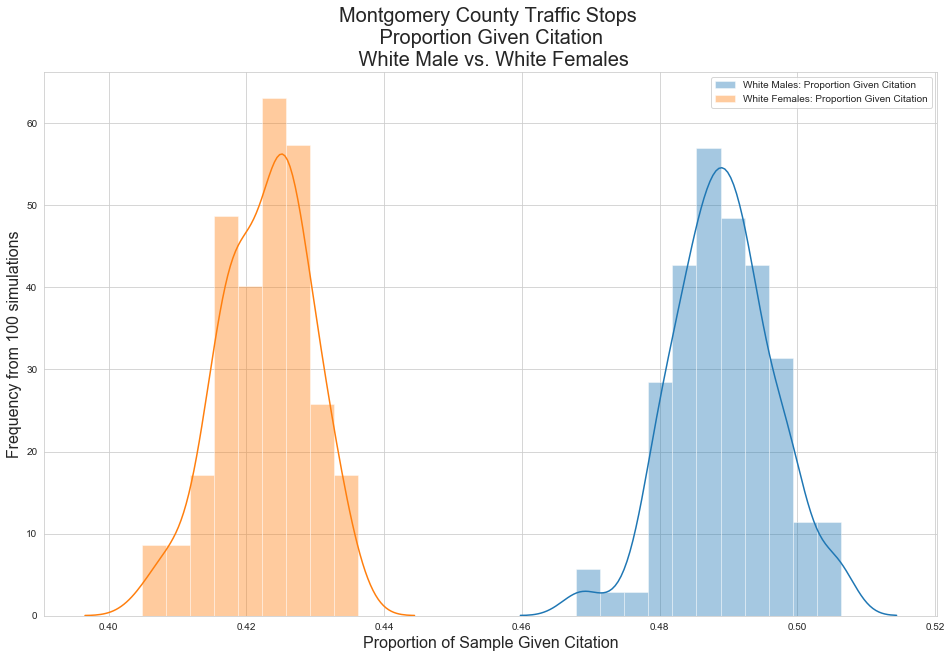

In [64]:
#White Male vs. White Female Citation Rate
fig = plt.figure(figsize=(16,10))

sns.distplot(mu_white_male_list, label="White Males: Proportion Given Citation")
sns.distplot(mu_white_female_list, label="White Females: Proportion Given Citation")


plt.title('Montgomery County Traffic Stops \n Proportion Given Citation \n White Male vs. White Females', fontsize=20)

plt.xlabel('Proportion of Sample Given Citation', fontsize=16)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=16)
plt.legend();

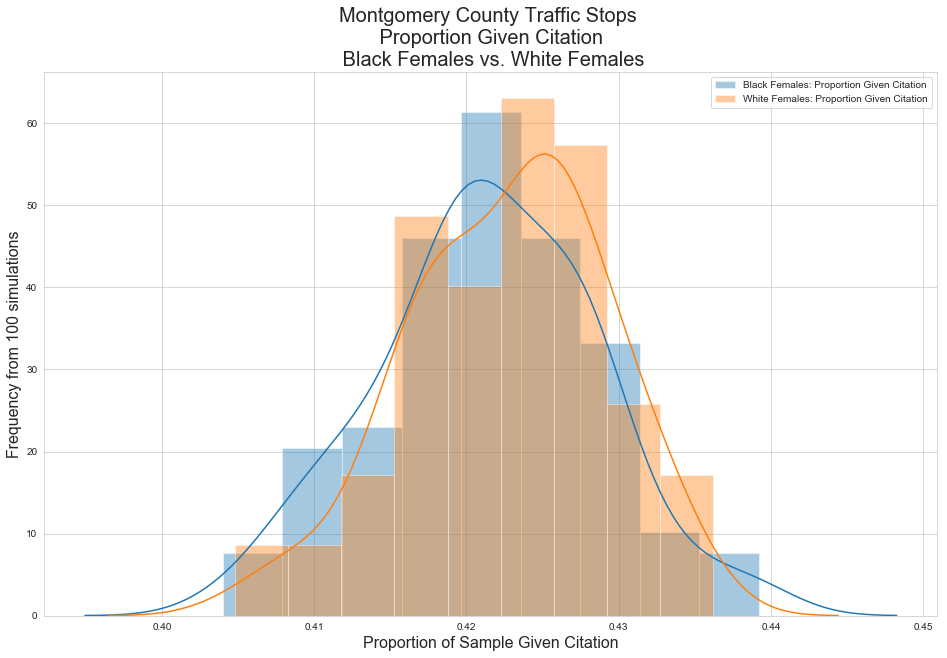

In [65]:
#White Female vs. Black Female Citation Rate
fig = plt.figure(figsize=(16,10))

sns.distplot(mu_black_female_list, label="Black Females: Proportion Given Citation")
sns.distplot(mu_white_female_list, label="White Females: Proportion Given Citation")


plt.title('Montgomery County Traffic Stops \n Proportion Given Citation \n Black Females vs. White Females', fontsize=20)

plt.xlabel('Proportion of Sample Given Citation', fontsize=16)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=16)
plt.legend();